# Prepare SpaceNet 7 Data for Model Training

We assume that initial steps of README have been executed and that this notebook is running in a docker container.  See the `src` directory for functions used in the algorithm.  

In [1]:
# Dataset location (edit as needed)
root_dir = '/home/ubuntu/sn7/aws_download/'

In [2]:
import multiprocessing
import pandas as pd
import numpy as np
import skimage
import gdal
import sys
import os
from tqdm import tqdm

import matplotlib as mpl
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.rcParams.update({'font.size': 16})
mpl.rcParams['figure.dpi'] = 300

import warnings
warnings.filterwarnings('ignore')

import solaris as sol
from solaris.raster.image import create_multiband_geotiff
from solaris.utils.core import _check_gdf_load

# import from data_prep_funcs
module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from sn7_baseline_prep_funcs import map_wrapper, make_geojsons_and_masks

In [3]:
# Create Training Masks
# Multi-thread to increase speed
# We'll only make a 1-channel mask for now, but Solaris supports a multi-channel mask as well, see
#     https://github.com/CosmiQ/solaris/blob/master/docs/tutorials/notebooks/api_masks_tutorial.ipynb

aois = sorted([f for f in os.listdir(os.path.join(root_dir, 'train'))
               if os.path.isdir(os.path.join(root_dir, 'train', f))])
n_threads = 10
params = [] 
make_fbc = True
output_path_mask = ''
input_args = []
for i, aoi in enumerate(tqdm(aois)):
    print(i, "aoi:", aoi)
    im_dir = os.path.join(root_dir, 'train', aoi, 'images_masked/')
    json_dir = os.path.join(root_dir, 'train', aoi, 'labels_match/')
    out_dir_mask = os.path.join(root_dir, 'train', aoi, 'masks/')
    out_dir_mask_fbc = os.path.join(root_dir, 'train', aoi, 'masks_fbc/')
    os.makedirs(out_dir_mask, exist_ok=True)
    if make_fbc:
        os.makedirs(out_dir_mask_fbc, exist_ok=True)

    json_files = sorted([f
                for f in os.listdir(os.path.join(json_dir))
                if f.endswith('Buildings.geojson') and os.path.exists(os.path.join(json_dir, f))])
    for j, f in enumerate(tqdm(json_files)):
        # print(i, j, f)
        name_root = f.split('.')[0]
        json_path = os.path.join(json_dir, f)
        image_path = os.path.join(im_dir, name_root + '.tif').replace('labels', 'images').replace('_Buildings', '')
        
        if make_fbc:
            #print('3 channel')
            output_path_mask_fbc = os.path.join(out_dir_mask_fbc, name_root + '.tif')
            
        else:
            output_path_mask = os.path.join(out_dir_mask, name_root + '.tif')
            output_path_mask_fbc = None
            
        if (os.path.exists(output_path_mask)):
             continue
        else: 
            input_args.append([make_geojsons_and_masks, 
                               name_root, image_path, json_path,
                               output_path_mask, output_path_mask_fbc])

# execute 
print("len input_args", len(input_args))
print("Execute...\n")
with multiprocessing.Pool(n_threads) as pool:
    pool.map(map_wrapper, input_args)


100%|██████████| 25/25 [00:00<00:00, 46253.90it/s]

100%|██████████| 25/25 [00:00<00:00, 30922.32it/s]

100%|██████████| 24/24 [00:00<00:00, 27421.22it/s]

100%|██████████| 24/24 [00:00<00:00, 28212.81it/s]

100%|██████████| 24/24 [00:00<00:00, 30183.90it/s]

100%|██████████| 22/22 [00:00<00:00, 30343.53it/s]

100%|██████████| 25/25 [00:00<00:00, 31479.32it/s]

100%|██████████| 24/24 [00:00<00:00, 29110.26it/s]

100%|██████████| 25/25 [00:00<00:00, 30696.02it/s]

100%|██████████| 24/24 [00:00<00:00, 30102.66it/s]

100%|██████████| 24/24 [00:00<00:00, 30165.81it/s]

100%|██████████| 21/21 [00:00<00:00, 23009.50it/s]

100%|██████████| 20/20 [00:00<00:00, 27639.57it/s]

100%|██████████| 21/21 [00:00<00:00, 26530.24it/s]

100%|██████████| 25/25 [00:00<00:00, 31832.91it/s]

100%|██████████| 25/25 [00:00<00:00, 29806.03it/s]

100%|██████████| 21/21 [00:00<00:00, 26878.36it/s]

100%|██████████| 25/25 [00:00<00:00, 27004.28it/s]

100%|██████████| 22/22 [00:00<00:00, 26933.65it/s]

100%|███████

0 aoi: L15-0331E-1257N_1327_3160_13
1 aoi: L15-0357E-1223N_1429_3296_13
2 aoi: L15-0358E-1220N_1433_3310_13
3 aoi: L15-0361E-1300N_1446_2989_13
4 aoi: L15-0368E-1245N_1474_3210_13
5 aoi: L15-0387E-1276N_1549_3087_13
6 aoi: L15-0434E-1218N_1736_3318_13
7 aoi: L15-0457E-1135N_1831_3648_13
8 aoi: L15-0487E-1246N_1950_3207_13
9 aoi: L15-0506E-1204N_2027_3374_13
10 aoi: L15-0544E-1228N_2176_3279_13
11 aoi: L15-0566E-1185N_2265_3451_13
12 aoi: L15-0571E-1075N_2287_3888_13
13 aoi: L15-0577E-1243N_2309_3217_13
14 aoi: L15-0586E-1127N_2345_3680_13
15 aoi: L15-0595E-1278N_2383_3079_13
16 aoi: L15-0614E-0946N_2459_4406_13
17 aoi: L15-0632E-0892N_2528_4620_13
18 aoi: L15-0683E-1006N_2732_4164_13
19 aoi: L15-0760E-0887N_3041_4643_13
20 aoi: L15-0924E-1108N_3699_3757_13
21 aoi: L15-0977E-1187N_3911_3441_13
22 aoi: L15-1014E-1375N_4056_2688_13
23 aoi: L15-1015E-1062N_4061_3941_13
24 aoi: L15-1025E-1366N_4102_2726_13
25 aoi: L15-1049E-1370N_4196_2710_13
26 aoi: L15-1138E-1216N_4553_3325_13
27 aoi: L15



100%|██████████| 25/25 [00:00<00:00, 39346.19it/s]

100%|██████████| 22/22 [00:00<00:00, 27660.28it/s]

100%|██████████| 24/24 [00:00<00:00, 76725.07it/s]

100%|██████████| 25/25 [00:00<00:00, 39658.70it/s]

100%|██████████| 60/60 [00:00<00:00, 266.22it/s]

55 aoi: L15-1703E-1219N_6813_3313_13
56 aoi: L15-1709E-1112N_6838_3742_13
57 aoi: L15-1716E-1211N_6864_3345_13
58 aoi: L15-1748E-1247N_6993_3202_13
59 aoi: L15-1848E-0793N_7394_5018_13
len input_args 1423
Execute...



name root:name root:name root:name root:  name root: name root:global_monthly_2018_12_mosaic_L15-0357E-1223N_1429_3296_13_Buildingsglobal_monthly_2018_01_mosaic_L15-0434E-1218N_1736_3318_13_Buildingsglobal_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13_Buildingsname root:
name root:
    global_monthly_2019_12_mosaic_L15-0487E-1246N_1950_3207_13_Buildingsglobal_monthly_2018_12_mosaic_L15-0457E-1135N_1831_3648_13_Buildings global_monthly_2018_12_mosaic_L15-0368E-1245N_1474_3210_13_Buildings
global_monthly_2019_12_mosaic_L15-0358E-1220N_1433_3310_13_Buildingsglobal_monthly_2018_11_mosaic_L15-0544E-1228N_2176_3279_13_Buildings




name root:name root: global_monthly_2019_08_mosaic_L15-0577E-1243N_2309_3217_13_Buildings 
global_monthly_2018_02_mosaic_L15-0571E-1075N_2287_3888_13_Buildings
time taken:  0.2243976593017578
name root: global_monthly_2018_02_mosaic_L15-0434E-1218N_1736_3318_13_Buildings
time taken:  0.34409022331237793
name root: global_monthly_2018_03_mosaic_L15-0434E-1218

time taken:  10.364217758178711
name root: global_monthly_2019_04_mosaic_L15-0331E-1257N_1327_3160_13_Buildings
time taken:  9.568997859954834
name root: global_monthly_2019_07_mosaic_L15-0506E-1204N_2027_3374_13_Buildings
time taken:  11.021653413772583
name root: global_monthly_2019_05_mosaic_L15-0331E-1257N_1327_3160_13_Buildings
time taken:  10.79682469367981
name root: global_monthly_2019_08_mosaic_L15-0506E-1204N_2027_3374_13_Buildings
time taken:  10.931525468826294
name root: global_monthly_2019_06_mosaic_L15-0331E-1257N_1327_3160_13_Buildings
time taken:  95.21608710289001
name root: global_monthly_2018_01_mosaic_L15-0361E-1300N_1446_2989_13_Buildings
time taken:  9.841984033584595
name root: global_monthly_2019_09_mosaic_L15-0506E-1204N_2027_3374_13_Buildings
time taken:  11.33908486366272
name root: global_monthly_2019_07_mosaic_L15-0331E-1257N_1327_3160_13_Buildings
time taken:  10.170454740524292
name root: global_monthly_2019_10_mosaic_L15-0506E-1204N_2027_3374_13_Buildin

name root: global_monthly_2018_03_mosaic_L15-0544E-1228N_2176_3279_13_Buildings
time taken:  6.74728536605835
name root: global_monthly_2019_02_mosaic_L15-0595E-1278N_2383_3079_13_Buildings
time taken:  140.1685333251953
name root: global_monthly_2020_01_mosaic_L15-0357E-1223N_1429_3296_13_Buildings
time taken:  7.9685821533203125
name root: global_monthly_2019_03_mosaic_L15-0595E-1278N_2383_3079_13_Buildings
time taken:  7.333444356918335
name root: global_monthly_2019_04_mosaic_L15-0595E-1278N_2383_3079_13_Buildings
time taken:  314.62398505210876
name root: global_monthly_2019_03_mosaic_L15-0368E-1245N_1474_3210_13_Buildings
time taken:  7.398190975189209
name root: global_monthly_2019_05_mosaic_L15-0595E-1278N_2383_3079_13_Buildings
time taken:  28.132919549942017
name root: global_monthly_2019_10_mosaic_L15-0361E-1300N_1446_2989_13_Buildings
time taken:  7.507877588272095
name root: global_monthly_2019_06_mosaic_L15-0595E-1278N_2383_3079_13_Buildings
time taken:  8.438421249389648

name root: global_monthly_2019_07_mosaic_L15-0544E-1228N_2176_3279_13_Buildings
time taken:  96.48859572410583
name root: global_monthly_2019_10_mosaic_L15-0358E-1220N_1433_3310_13_Buildings
time taken:  549.5660374164581
name root: global_monthly_2019_05_mosaic_L15-0457E-1135N_1831_3648_13_Buildings
time taken:  97.67766308784485
name root: global_monthly_2019_11_mosaic_L15-0358E-1220N_1433_3310_13_Buildings
time taken:  315.94935369491577
name root: global_monthly_2018_08_mosaic_L15-0368E-1245N_1474_3210_13_Buildings
time taken:  96.38371968269348
name root: global_monthly_2019_10_mosaic_L15-0614E-0946N_2459_4406_13_Buildings
time taken:  334.6900897026062
name root: global_monthly_2019_09_mosaic_L15-0368E-1245N_1474_3210_13_Buildings
time taken:  336.91838335990906
name root: global_monthly_2018_09_mosaic_L15-0544E-1228N_2176_3279_13_Buildings
time taken:  338.25330877304077
name root: global_monthly_2019_08_mosaic_L15-0544E-1228N_2176_3279_13_Buildings
time taken:  591.862387180328

name root: global_monthly_2019_05_mosaic_L15-0387E-1276N_1549_3087_13_Buildings
time taken:  4.879085540771484
name root: global_monthly_2019_12_mosaic_L15-0566E-1185N_2265_3451_13_Buildings
time taken:  4.0953757762908936
name root: global_monthly_2020_01_mosaic_L15-0566E-1185N_2265_3451_13_Buildings
time taken:  4.7815141677856445
name root: global_monthly_2018_01_mosaic_L15-0571E-1075N_2287_3888_13_Buildings
time taken:  14.424217939376831
name root: global_monthly_2019_06_mosaic_L15-0387E-1276N_1549_3087_13_Buildings
time taken:  12.459225177764893
name root: global_monthly_2019_07_mosaic_L15-0387E-1276N_1549_3087_13_Buildings
time taken:  14.292027950286865
name root: global_monthly_2019_08_mosaic_L15-0387E-1276N_1549_3087_13_Buildings
time taken:  14.597814321517944
name root: global_monthly_2019_09_mosaic_L15-0387E-1276N_1549_3087_13_Buildings
time taken:  14.41780972480774
name root: global_monthly_2019_10_mosaic_L15-0387E-1276N_1549_3087_13_Buildings
time taken:  12.5453054904

name root: global_monthly_2018_05_mosaic_L15-1014E-1375N_4056_2688_13_Buildings
time taken:  78.72155666351318
name root: global_monthly_2018_05_mosaic_L15-1015E-1062N_4061_3941_13_Buildings
time taken:  33.13881874084473
name root: global_monthly_2018_06_mosaic_L15-1015E-1062N_4061_3941_13_Buildings
time taken:  40.43272304534912
name root: global_monthly_2018_06_mosaic_L15-1014E-1375N_4056_2688_13_Buildings
time taken:  19.136833667755127
name root: global_monthly_2018_10_mosaic_L15-1015E-1062N_4061_3941_13_Buildings
time taken:  39.55072855949402
name root: global_monthly_2018_07_mosaic_L15-1014E-1375N_4056_2688_13_Buildings
time taken:  27.660547733306885
name root: global_monthly_2018_11_mosaic_L15-1015E-1062N_4061_3941_13_Buildings
time taken:  379.9761092662811
name root: global_monthly_2018_04_mosaic_L15-0924E-1108N_3699_3757_13_Buildings
time taken:  523.6123070716858
name root: global_monthly_2019_05_mosaic_L15-1025E-1366N_4102_2726_13_Buildings
time taken:  27.16087341308593

name root: global_monthly_2018_06_mosaic_L15-1138E-1216N_4553_3325_13_Buildings
time taken:  40.290443420410156
name root: global_monthly_2019_07_mosaic_L15-1014E-1375N_4056_2688_13_Buildings
time taken:  48.52254867553711
name root: global_monthly_2018_02_mosaic_L15-1025E-1366N_4102_2726_13_Buildings
time taken:  42.724682331085205
name root: global_monthly_2018_07_mosaic_L15-1138E-1216N_4553_3325_13_Buildings
time taken:  3.3983590602874756
name root: global_monthly_2018_08_mosaic_L15-1138E-1216N_4553_3325_13_Buildings
time taken:  40.6476035118103
name root: global_monthly_2019_08_mosaic_L15-1014E-1375N_4056_2688_13_Buildings
time taken:  36.027870893478394
name root: global_monthly_2018_03_mosaic_L15-1025E-1366N_4102_2726_13_Buildings
time taken:  42.875760555267334
name root: global_monthly_2018_09_mosaic_L15-1138E-1216N_4553_3325_13_Buildings
time taken: time taken:   41.742810010910034
495.7706639766693
name root: global_monthly_2019_09_mosaic_L15-1014E-1375N_4056_2688_13_Buildi

name root: global_monthly_2018_12_mosaic_L15-0632E-0892N_2528_4620_13_Buildings
time taken:  143.02753949165344
name root: global_monthly_2018_07_mosaic_L15-1185E-0935N_4742_4450_13_Buildings
time taken:  45.739434480667114
name root: global_monthly_2019_01_mosaic_L15-0632E-0892N_2528_4620_13_Buildings
time taken:  147.43308401107788
name root: global_monthly_2018_01_mosaic_L15-1172E-1306N_4688_2967_13_Buildings
time taken:  14.946906089782715
name root: global_monthly_2018_02_mosaic_L15-1172E-1306N_4688_2967_13_Buildings
time taken:  14.702337265014648
name root: global_monthly_2018_03_mosaic_L15-1172E-1306N_4688_2967_13_Buildings
time taken:  227.6363446712494
name root: global_monthly_2019_07_mosaic_L15-0586E-1127N_2345_3680_13_Buildings
time taken:  15.11669921875
name root: global_monthly_2018_04_mosaic_L15-1172E-1306N_4688_2967_13_Buildings
time taken:  48.18830108642578
name root: global_monthly_2019_02_mosaic_L15-0632E-0892N_2528_4620_13_Buildings
time taken:  15.05115103721618

name root: global_monthly_2018_09_mosaic_L15-1185E-0935N_4742_4450_13_Buildings
time taken:  7.488365650177002
name root: global_monthly_2018_01_mosaic_L15-1204E-1204N_4819_3372_13_Buildings
time taken:  23.89254665374756
name root: global_monthly_2018_01_mosaic_L15-0683E-1006N_2732_4164_13_Buildings
time taken:  3.7617266178131104
name root: global_monthly_2018_02_mosaic_L15-1204E-1204N_4819_3372_13_Buildings
time taken:  3.8516626358032227
name root: global_monthly_2018_03_mosaic_L15-1204E-1204N_4819_3372_13_Buildings
time taken:  3.6879050731658936
name root: global_monthly_2018_04_mosaic_L15-1204E-1204N_4819_3372_13_Buildings
time taken:  4.162064075469971
name root: global_monthly_2018_05_mosaic_L15-1204E-1204N_4819_3372_13_Buildings
time taken:  3.22861647605896
name root: global_monthly_2018_06_mosaic_L15-1204E-1204N_4819_3372_13_Buildings
time taken:  3.720379590988159
name root: global_monthly_2018_07_mosaic_L15-1204E-1204N_4819_3372_13_Buildings
time taken:  3.9665687084198
n

name root: global_monthly_2019_08_mosaic_L15-1185E-0935N_4742_4450_13_Buildings
time taken:  361.16361808776855
name root: global_monthly_2018_11_mosaic_L15-1200E-0847N_4802_4803_13_Buildings
time taken:  126.55712842941284
time taken: name root:  320.3746418952942global_monthly_2019_06_mosaic_L15-1209E-1113N_4838_3737_13_Buildings

name root: global_monthly_2019_05_mosaic_L15-0924E-1108N_3699_3757_13_Buildings
time taken:  122.25026082992554
name root: global_monthly_2019_07_mosaic_L15-1209E-1113N_4838_3737_13_Buildings
time taken:  2181.1277248859406
name root: global_monthly_2018_02_mosaic_L15-0683E-1006N_2732_4164_13_Buildings
time taken:  169.9824767112732
name root: global_monthly_2019_09_mosaic_L15-1185E-0935N_4742_4450_13_Buildings
time taken:  120.9231264591217
name root: global_monthly_2019_08_mosaic_L15-1209E-1113N_4838_3737_13_Buildings
time taken:  312.01148414611816
name root: global_monthly_2019_06_mosaic_L15-0924E-1108N_3699_3757_13_Buildings
time taken:  369.8244605064

name root: global_monthly_2020_01_mosaic_L15-0924E-1108N_3699_3757_13_Buildings
time taken:  331.8912343978882
name root: global_monthly_2018_05_mosaic_L15-1289E-1169N_5156_3514_13_Buildings
time taken:  137.70679807662964
name root: global_monthly_2020_01_mosaic_L15-1209E-1113N_4838_3737_13_Buildings
time taken:  106.05447173118591
name root: global_monthly_2018_06_mosaic_L15-1289E-1169N_5156_3514_13_Buildings
time taken:  354.6725912094116
name root: global_monthly_2019_06_mosaic_L15-1200E-0847N_4802_4803_13_Buildings
time taken:  140.31246948242188
name root: global_monthly_2018_01_mosaic_L15-1210E-1025N_4840_4088_13_Buildings
time taken:  107.10623049736023
name root: global_monthly_2018_07_mosaic_L15-1289E-1169N_5156_3514_13_Buildings
time taken:  328.2071726322174
name root: global_monthly_2018_09_mosaic_L15-1289E-1169N_5156_3514_13_Buildings
time taken:  95.8608090877533
name root: global_monthly_2019_07_mosaic_L15-1296E-1198N_5184_3399_13_Buildings
time taken:  98.7804217338562

name root: global_monthly_2019_07_mosaic_L15-1335E-1166N_5342_3524_13_Buildings
time taken:  1.4180166721343994
name root: global_monthly_2019_08_mosaic_L15-1335E-1166N_5342_3524_13_Buildings
time taken:  1.8576290607452393
name root: global_monthly_2019_09_mosaic_L15-1335E-1166N_5342_3524_13_Buildings
time taken:  43.413952112197876
name root: global_monthly_2018_10_mosaic_L15-0977E-1187N_3911_3441_13_Buildings
time taken:  2.3364856243133545
name root: global_monthly_2019_10_mosaic_L15-1335E-1166N_5342_3524_13_Buildings
time taken:  2.340900421142578
name root: global_monthly_2019_11_mosaic_L15-1335E-1166N_5342_3524_13_Buildings
time taken:  2.315842628479004
name root: global_monthly_2019_12_mosaic_L15-1335E-1166N_5342_3524_13_Buildings
time taken:  3.050739288330078
name root: global_monthly_2020_01_mosaic_L15-1335E-1166N_5342_3524_13_Buildings
time taken:  2.7565135955810547
name root: global_monthly_2018_02_mosaic_L15-1389E-1284N_5557_3054_13_Buildings
time taken:  3.010324954986

name root: global_monthly_2019_05_mosaic_L15-1439E-1134N_5759_3655_13_Buildings
time taken:  464.56650376319885
name root: global_monthly_2019_10_mosaic_L15-1200E-0847N_4802_4803_13_Buildings
time taken:  12.1562979221344
name root: global_monthly_2019_01_mosaic_L15-1481E-1119N_5927_3715_13_Buildings
time taken:  12.059410333633423
name root: global_monthly_2019_02_mosaic_L15-1481E-1119N_5927_3715_13_Buildings
time taken:  11.706087589263916
name root: global_monthly_2019_03_mosaic_L15-1481E-1119N_5927_3715_13_Buildings
time taken:  23.424794912338257
name root: global_monthly_2019_04_mosaic_L15-1481E-1119N_5927_3715_13_Buildings
time taken:  103.15143871307373
name root: global_monthly_2020_01_mosaic_L15-1289E-1169N_5156_3514_13_Buildings
time taken:  24.628557682037354
name root: global_monthly_2019_05_mosaic_L15-1481E-1119N_5927_3715_13_Buildings
time taken:  25.880724668502808
name root: global_monthly_2019_06_mosaic_L15-1481E-1119N_5927_3715_13_Buildings
time taken:  198.450175762

name root: global_monthly_2019_07_mosaic_L15-1479E-1101N_5916_3785_13_Buildings
time taken:  11.613948583602905
name root: global_monthly_2019_08_mosaic_L15-1479E-1101N_5916_3785_13_Buildings
time taken:  21.79374933242798
name root: global_monthly_2019_09_mosaic_L15-1479E-1101N_5916_3785_13_Buildings
time taken:  206.94248461723328
name root: global_monthly_2018_01_mosaic_L15-1615E-1206N_6460_3366_13_Buildings
time taken:  544.0342869758606
name root: global_monthly_2020_01_mosaic_L15-1200E-0847N_4802_4803_13_Buildings
time taken:  21.655842781066895
name root: global_monthly_2019_11_mosaic_L15-1479E-1101N_5916_3785_13_Buildings
time taken:  10.357011318206787
name root: global_monthly_2019_12_mosaic_L15-1479E-1101N_5916_3785_13_Buildings
time taken:  10.653821229934692
name root: global_monthly_2020_01_mosaic_L15-1479E-1101N_5916_3785_13_Buildings
time taken:  11.378965139389038
name root: global_monthly_2018_01_mosaic_L15-1481E-1119N_5927_3715_13_Buildings
time taken:  6.66793441772

name root: global_monthly_2018_08_mosaic_L15-1538E-1163N_6154_3539_13_Buildings
time taken:  12.09818410873413
name root: global_monthly_2018_04_mosaic_L15-1669E-1153N_6678_3579_13_Buildings
time taken:  11.930459976196289
name root: global_monthly_2018_05_mosaic_L15-1669E-1153N_6678_3579_13_Buildings
time taken:  39.568098306655884
name root: global_monthly_2019_06_mosaic_L15-1669E-1160N_6678_3548_13_Buildings
time taken:  12.286278247833252
name root: global_monthly_2018_06_mosaic_L15-1669E-1153N_6678_3579_13_Buildings
time taken:  97.45366191864014
name root: global_monthly_2018_04_mosaic_L15-1617E-1207N_6468_3360_13_Buildings
time taken:  12.103541374206543
name root: global_monthly_2018_07_mosaic_L15-1669E-1153N_6678_3579_13_Buildings
time taken:  6.25251030921936
name root: global_monthly_2018_09_mosaic_L15-1669E-1153N_6678_3579_13_Buildings
time taken:  33.03303265571594
name root: global_monthly_2019_07_mosaic_L15-1669E-1160N_6678_3548_13_Buildings
time taken:  11.3138608932495

name root: global_monthly_2019_03_mosaic_L15-1615E-1205N_6460_3370_13_Buildings
time taken:  21.917177438735962
name root: global_monthly_2019_04_mosaic_L15-1615E-1205N_6460_3370_13_Buildings
time taken:  29.398865699768066
name root: global_monthly_2019_05_mosaic_L15-1615E-1205N_6460_3370_13_Buildings
time taken:  time taken: 84.3922848701477 
99.55760502815247
name root: name root:global_monthly_2018_04_mosaic_L15-1669E-1160N_6679_3549_13_Buildings 
global_monthly_2018_11_mosaic_L15-1617E-1207N_6468_3360_13_Buildings
time taken:  27.823089122772217
name root: global_monthly_2019_06_mosaic_L15-1615E-1205N_6460_3370_13_Buildings
time taken:  21.51312565803528
name root: global_monthly_2019_07_mosaic_L15-1615E-1205N_6460_3370_13_Buildings
time taken:  129.63732933998108
name root: global_monthly_2019_09_mosaic_L15-1669E-1160N_6679_3549_13_Buildings
time taken:  21.09309482574463
name root: global_monthly_2019_08_mosaic_L15-1615E-1205N_6460_3370_13_Buildings
time taken:  21.2249491214752

name root: global_monthly_2019_02_mosaic_L15-1538E-1163N_6154_3539_13_Buildings
time taken:  11.351493120193481
name root: global_monthly_2017_07_mosaic_L15-1690E-1211N_6763_3346_13_Buildings
time taken:  35.87123441696167
name root: global_monthly_2017_10_mosaic_L15-1691E-1211N_6764_3347_13_Buildings
time taken:  17.95828914642334
name root: global_monthly_2017_08_mosaic_L15-1690E-1211N_6763_3346_13_Buildings
time taken:  14.974613189697266
name root: global_monthly_2017_10_mosaic_L15-1690E-1211N_6763_3346_13_Buildings
time taken:  19.260807275772095
name root: global_monthly_2017_11_mosaic_L15-1691E-1211N_6764_3347_13_Buildings
time taken:  14.37842607498169
name root: global_monthly_2017_11_mosaic_L15-1690E-1211N_6763_3346_13_Buildings
time taken:  19.626933813095093
name root: global_monthly_2018_01_mosaic_L15-1691E-1211N_6764_3347_13_Buildings
time taken:  14.166664123535156
name root: global_monthly_2018_01_mosaic_L15-1690E-1211N_6763_3346_13_Buildings
time taken:  98.03445649147

name root: global_monthly_2019_12_mosaic_L15-1848E-0793N_7394_5018_13_Buildings
time taken:  10.89564561843872
name root: global_monthly_2020_01_mosaic_L15-1848E-0793N_7394_5018_13_Buildings
time taken:  510.70859146118164
name root: global_monthly_2018_11_mosaic_L15-1438E-1134N_5753_3655_13_Buildings
time taken:  12.103586196899414
time taken:  63.28114128112793
name root: global_monthly_2018_11_mosaic_L15-1703E-1219N_6813_3313_13_Buildings
time taken:  228.58181190490723
name root: global_monthly_2018_10_mosaic_L15-1709E-1112N_6838_3742_13_Buildings
time taken:  55.05603289604187
name root: global_monthly_2018_12_mosaic_L15-1703E-1219N_6813_3313_13_Buildings
time taken:  138.5192630290985
time taken:  46.63855791091919
name root: global_monthly_2019_01_mosaic_L15-1703E-1219N_6813_3313_13_Buildings
time taken:  46.45230460166931
name root: global_monthly_2019_02_mosaic_L15-1703E-1219N_6813_3313_13_Buildings
time taken:  193.12178826332092
name root: global_monthly_2018_11_mosaic_L15-1

name root: global_monthly_2018_05_mosaic_L15-1439E-1134N_5759_3655_13_Buildings
time taken:  121.58306241035461
name root: global_monthly_2018_06_mosaic_L15-1439E-1134N_5759_3655_13_Buildings
time taken:  63.621259689331055
name root: global_monthly_2018_10_mosaic_L15-1439E-1134N_5759_3655_13_Buildings
time taken:  152.73230004310608
time taken:  1929.0630524158478
name root: global_monthly_2019_01_mosaic_L15-1716E-1211N_6864_3345_13_Buildings
time taken:  1555.335454940796
name root: global_monthly_2018_09_mosaic_L15-0683E-1006N_2732_4164_13_Buildings
time taken:  14578.253153562546
name root: global_monthly_2018_07_mosaic_L15-0571E-1075N_2287_3888_13_Buildings
time taken:  141.49041986465454
name root: global_monthly_2019_02_mosaic_L15-1716E-1211N_6864_3345_13_Buildings
time taken:  500.3568778038025
name root: global_monthly_2019_03_mosaic_L15-1716E-1211N_6864_3345_13_Buildings
time taken:  1684.1138937473297
name root: global_monthly_2018_01_mosaic_L15-1748E-1247N_6993_3202_13_Buil

name root: global_monthly_2019_12_mosaic_L15-0683E-1006N_2732_4164_13_Buildings
time taken:  1878.9748916625977
name root: global_monthly_2019_09_mosaic_L15-0571E-1075N_2287_3888_13_Buildings
time taken:  1214.8523814678192
name root: global_monthly_2019_11_mosaic_L15-0571E-1075N_2287_3888_13_Buildings
time taken:  2214.493921518326
name root: global_monthly_2020_01_mosaic_L15-0571E-1075N_2287_3888_13_Buildings
time taken:  1654.3962924480438
name root: global_monthly_2018_02_mosaic_L15-0577E-1243N_2309_3217_13_Buildings
time taken:  14.026141881942749
name root: global_monthly_2018_04_mosaic_L15-0577E-1243N_2309_3217_13_Buildings
time taken:  14.284900426864624
name root: global_monthly_2018_05_mosaic_L15-0577E-1243N_2309_3217_13_Buildings
time taken:  13.916842222213745
name root: global_monthly_2018_06_mosaic_L15-0577E-1243N_2309_3217_13_Buildings
time taken:  13.781548500061035
name root: global_monthly_2018_07_mosaic_L15-0577E-1243N_2309_3217_13_Buildings
time taken:  13.799049377

In [ ]:
# Inspect visually

aoi = 'L15-0331E-1257N_1327_3160_13'
im_dir = os.path.join(root_dir, 'train', aoi, 'images_masked')
mask_dir = os.path.join(root_dir, 'train', aoi, 'masks')

im_list = sorted([z for z in os.listdir(im_dir) if z.endswith('.tif')])
im_file = im_list[0]

im_path = os.path.join(im_dir, im_file)
mask_path = os.path.join(mask_dir, im_file.split('.')[0] + '_Buildings.tif')
im = skimage.io.imread(im_path)
mask = skimage.io.imread(mask_path)

figsize=(24, 12)
name = im_file.split('.')[0].split('global_monthly_')[-1]
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=figsize)
_ = ax0.imshow(im)
ax0.set_xticks([])
ax0.set_yticks([])
# _ = ax0.set_title(name)
_ = ax1.imshow(mask)
ax1.set_xticks([])
ax1.set_yticks([])
# _ = ax1.set_title(name)
_ = fig.suptitle(name)
plt.tight_layout()

name_root: global_monthly_2018_01_mosaic_L15-0331E-1257N_1327_3160_13_Buildings


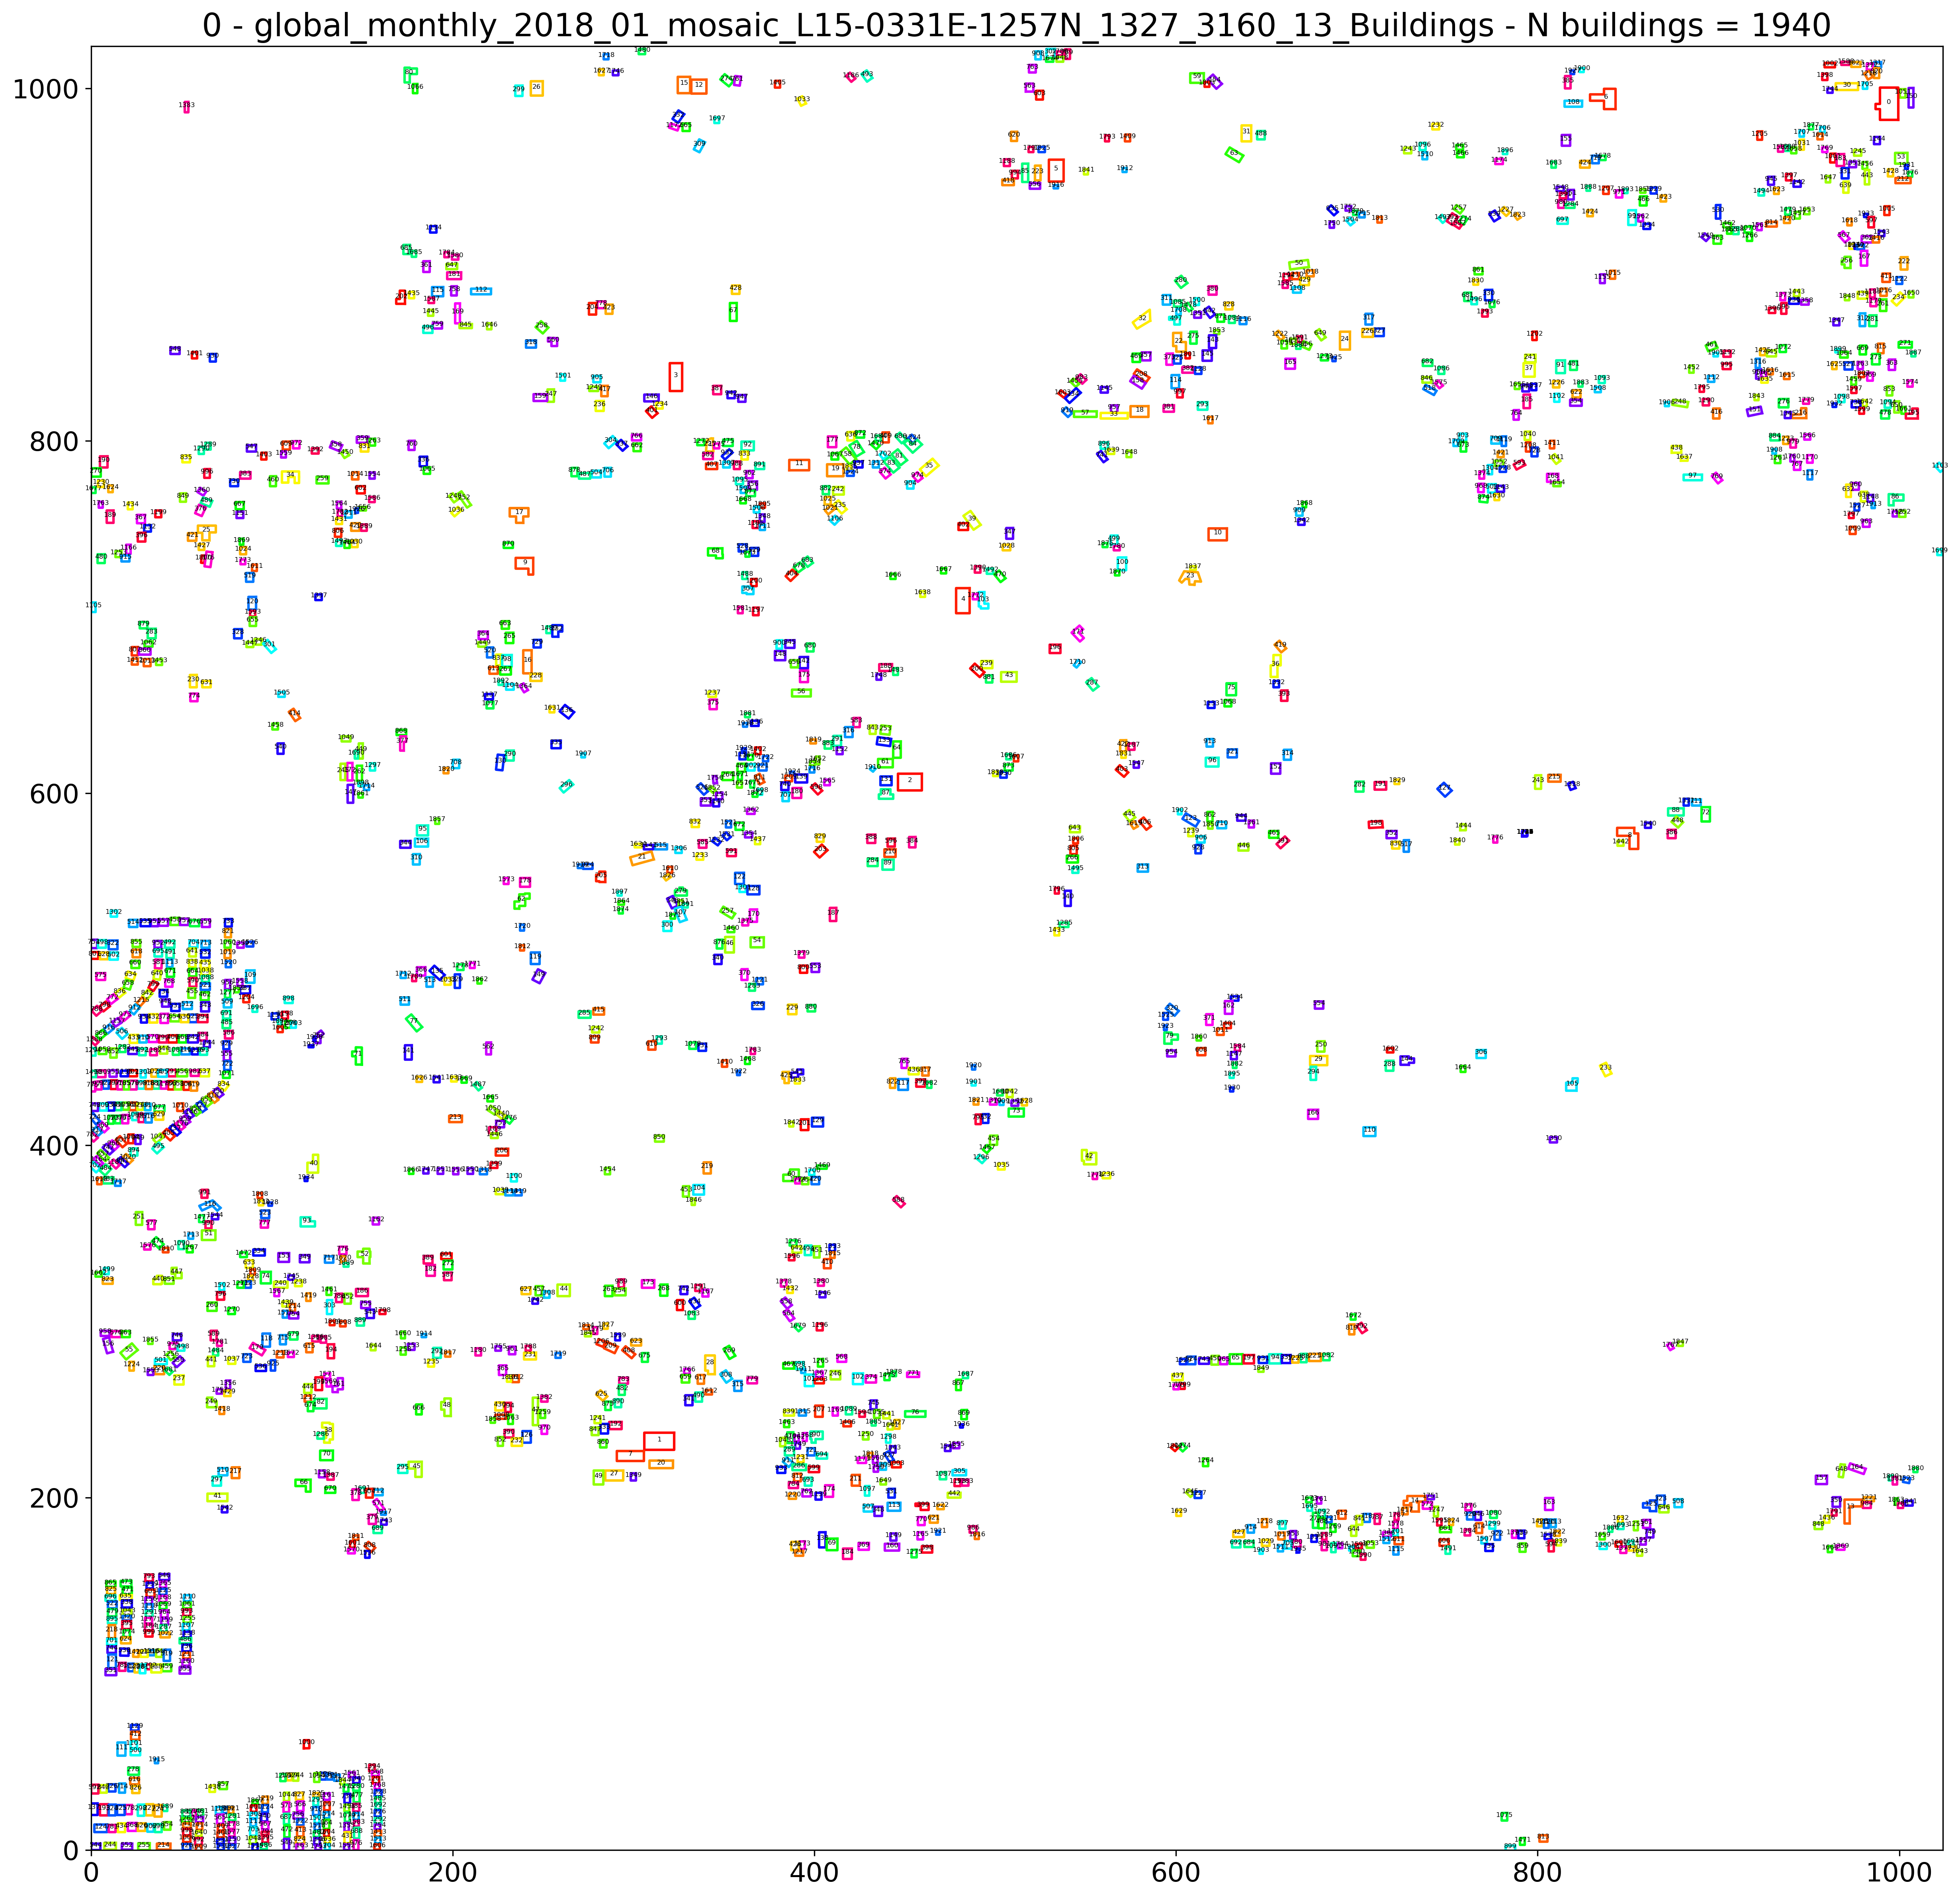

name_root: global_monthly_2020_01_mosaic_L15-0331E-1257N_1327_3160_13_Buildings


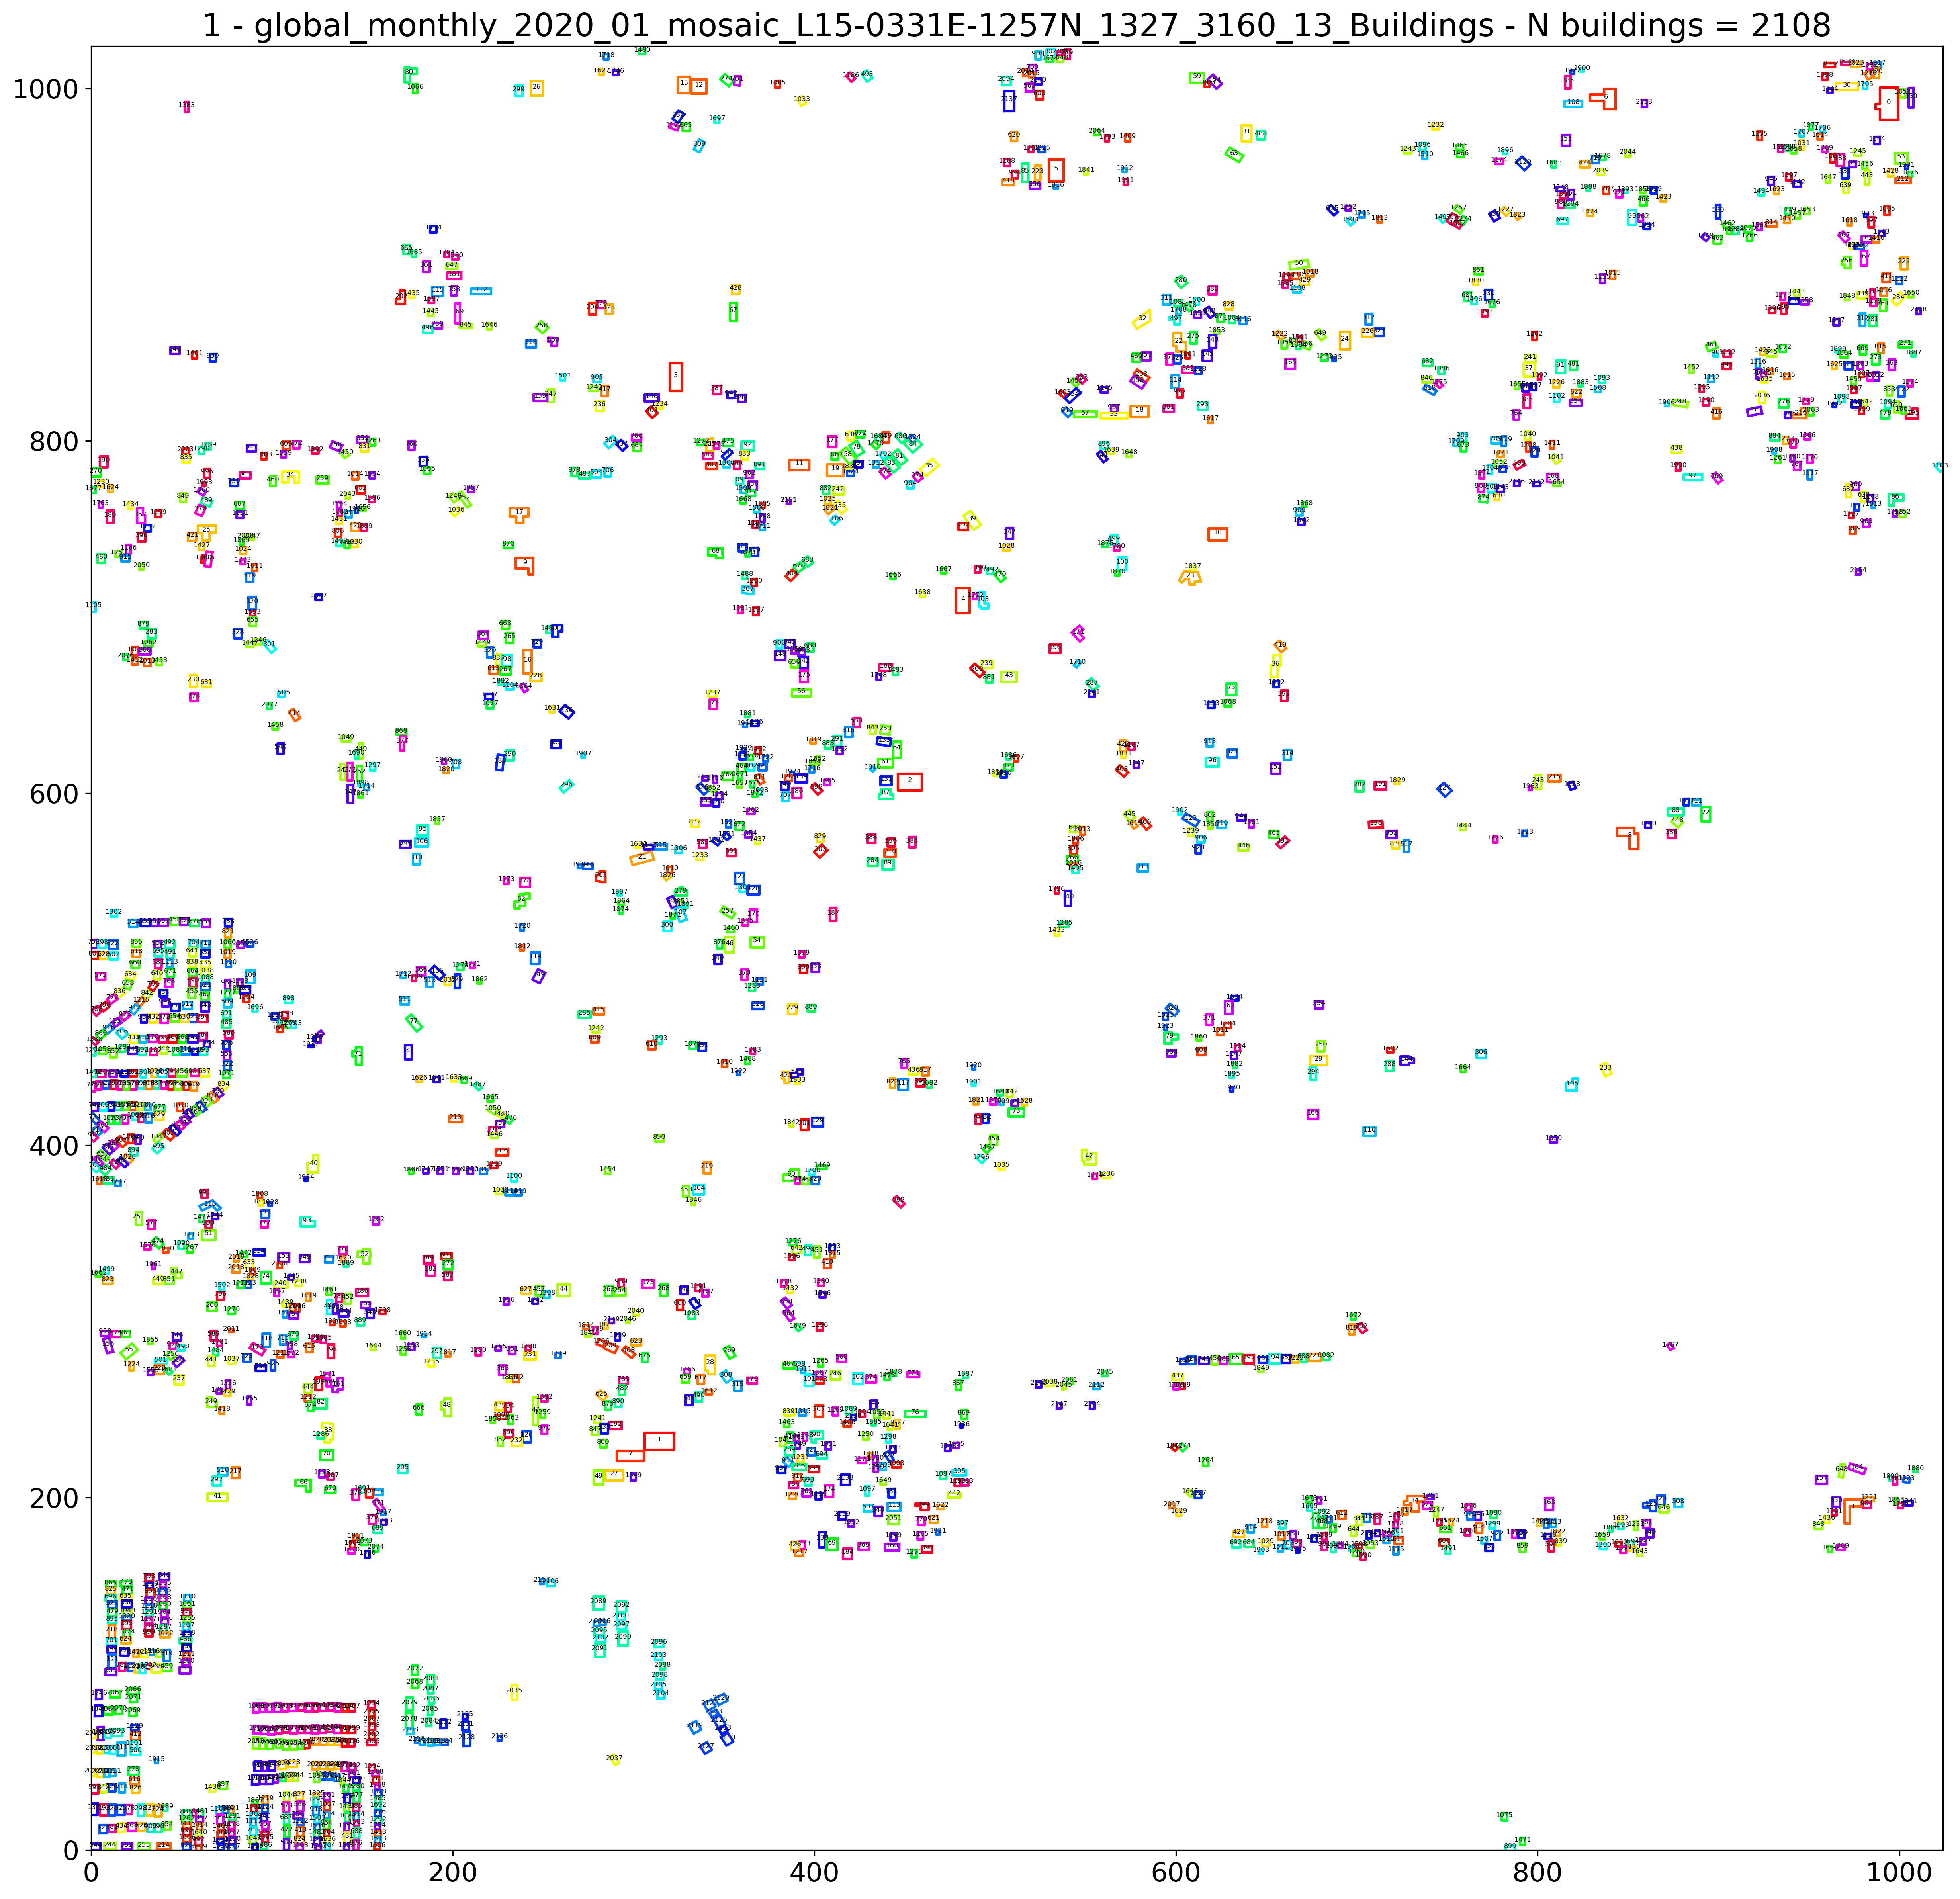

In [7]:
# make identifier plots

aoi = 'L15-0331E-1257N_1327_3160_13'
im_dir = os.path.join(root_dir, 'train', aoi, 'images_masked')
json_dir = os.path.join(root_dir, 'train', aoi, 'labels_match/')

# colors
vmax = 200
cmap = plt.get_cmap('hsv')  # 'jet'
cNorm  = colors.Normalize(vmin=0, vmax=vmax)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
plot_only_first_and_last = True
label_font_size = 4
im_pix_size_x, im_pix_size_y = 1024, 1024
figsize=(20,20)

json_files = sorted([f
            for f in os.listdir(json_dir)
            if f.endswith('Buildings.geojson') and os.path.exists(os.path.join(json_dir, f))])
if plot_only_first_and_last:
    json_files = [json_files[0], json_files[-1]]

# convert json
for j, f in enumerate(json_files):
    # print(i, j, f)
    name_root = f.split('.')[0]
    json_path = os.path.join(json_dir, f)
    image_path = os.path.join(im_dir, name_root + '.tif').replace('_Buildings', '')
    print("name_root:", name_root)
    # print("json_path", json_path)
    # output_path = os.path.join(out_dir, f)
    # if os.path.exists(output_path):
    #    print("  path exists, skipping:", name_root)
    #    continue
    gdf_pix = sol.vector.polygon.geojson_to_px_gdf(json_path, image_path, geom_col='geometry', precision=None,
                  output_path=None, override_crs=False)
    fig, ax = plt.subplots(figsize=figsize)
    for _, row in gdf_pix.iterrows():
        geom = row['geometry']
        poly_id = row['Id']
        x, y = geom.exterior.xy
        cx, cy = np.array(geom.centroid.xy).astype(float)
        #print("centroid:", centroid)
        color_int = int(poly_id) % vmax
        colorVal = scalarMap.to_rgba(color_int)
        ax.plot(x, y, c=colorVal)
        # poly id
        ax.annotate(str(poly_id), xy=(cx, cy), ha='center', size=label_font_size)
        #text_object = plt.annotate(label, xy=(x_values[i], y_values[i]), ha='center')
        #ax.text(cx, cy, str(poly_id))
    ax.set_xlim(0, im_pix_size_x)
    ax.set_ylim(0, im_pix_size_y)
    title = str(j) + " - " + name_root + " - N buildings = " + str(len(gdf_pix))
    ax.set_title(title)

    plt.show()

In [8]:
# Make dataframe csvs for train/test

out_dir = os.path.join(root_dir, 'csvs/')
pops = ['train', 'test_public']
os.makedirs(out_dir, exist_ok=True)

for pop in pops: 
    d = os.path.join(root_dir, pop)
    outpath = os.path.join(out_dir, 'sn7_baseline_' + pop + '_df.csv')
    im_list, mask_list = [], []
    subdirs = sorted([f for f in os.listdir(d) if os.path.isdir(os.path.join(d, f))])
    for subdir in subdirs:
        
        if pop == 'train':
            if make_fbc:
                im_files = [os.path.join(d, subdir, 'images_masked', f)
                        for f in sorted(os.listdir(os.path.join(d, subdir, 'images_masked')))
                        if f.endswith('.tif') and os.path.exists(os.path.join(d, subdir, 'masks_fbc', f.split('.')[0] + '_Buildings.tif'))]
                mask_files = [os.path.join(d, subdir, 'masks_fbc', f.split('.')[0] + '_Buildings.tif')
                          for f in sorted(os.listdir(os.path.join(d, subdir, 'images_masked')))
                          if f.endswith('.tif') and os.path.exists(os.path.join(d, subdir, 'masks_fbc', f.split('.')[0] + '_Buildings.tif'))]
                im_list.extend(im_files)
                mask_list.extend(mask_files)
            else:
                im_files = [os.path.join(d, subdir, 'images_masked', f)
                        for f in sorted(os.listdir(os.path.join(d, subdir, 'images_masked')))
                        if f.endswith('.tif') and os.path.exists(os.path.join(d, subdir, 'masks', f.split('.')[0] + '_Buildings.tif'))]
                mask_files = [os.path.join(d, subdir, 'masks', f.split('.')[0] + '_Buildings.tif')
                          for f in sorted(os.listdir(os.path.join(d, subdir, 'images_masked')))
                          if f.endswith('.tif') and os.path.exists(os.path.join(d, subdir, 'masks', f.split('.')[0] + '_Buildings.tif'))]
                im_list.extend(im_files)
                mask_list.extend(mask_files)
    
        elif pop == 'test_public':
            im_files = [os.path.join(d, subdir, 'images_masked', f)
                    for f in sorted(os.listdir(os.path.join(d, subdir, 'images_masked')))
                    if f.endswith('.tif')]
            im_list.extend(im_files)

    # save to dataframes
    # print("im_list:", im_list)
    # print("mask_list:", mask_list)
    if pop == 'train':
        df = pd.DataFrame({'image': im_list, 'label': mask_list})
        display(df.head())
    elif pop == 'test_public':
        df = pd.DataFrame({'image': im_list})
    df.to_csv(outpath, index=False)
    print(pop, "len df:", len(df))
    print("output csv:", outpath)

image  \
0  /home/ubuntu/sn7/aws_download/train/L15-0331E-...   
1  /home/ubuntu/sn7/aws_download/train/L15-0331E-...   
2  /home/ubuntu/sn7/aws_download/train/L15-0331E-...   
3  /home/ubuntu/sn7/aws_download/train/L15-0331E-...   
4  /home/ubuntu/sn7/aws_download/train/L15-0331E-...   

                                               label  
0  /home/ubuntu/sn7/aws_download/train/L15-0331E-...  
1  /home/ubuntu/sn7/aws_download/train/L15-0331E-...  
2  /home/ubuntu/sn7/aws_download/train/L15-0331E-...  
3  /home/ubuntu/sn7/aws_download/train/L15-0331E-...  
4  /home/ubuntu/sn7/aws_download/train/L15-0331E-...

train len df: 1423
output csv: /home/ubuntu/sn7/aws_download/csvs/sn7_baseline_train_df.csv
test_public len df: 466
output csv: /home/ubuntu/sn7/aws_download/csvs/sn7_baseline_test_public_df.csv


--------
We are now ready to proceed with training and testing, see sn7_baseline.ipynb.